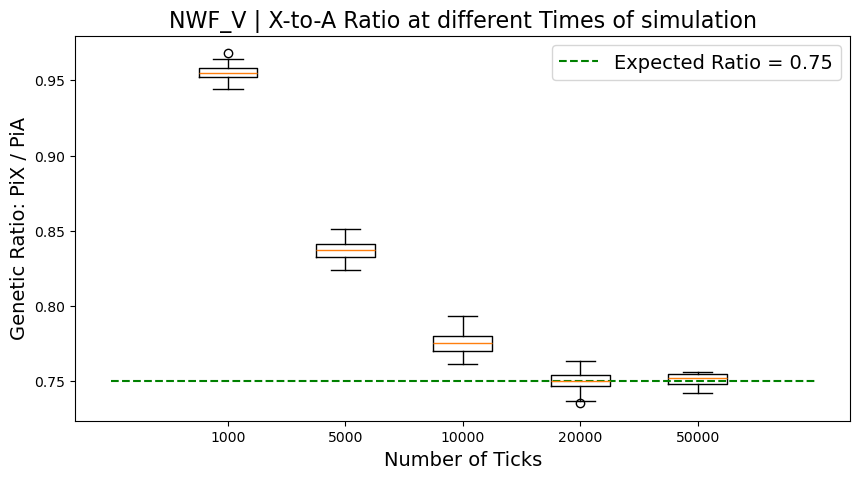


---------------------------------------------------------------------------------------------------------------------------------------------------------------------



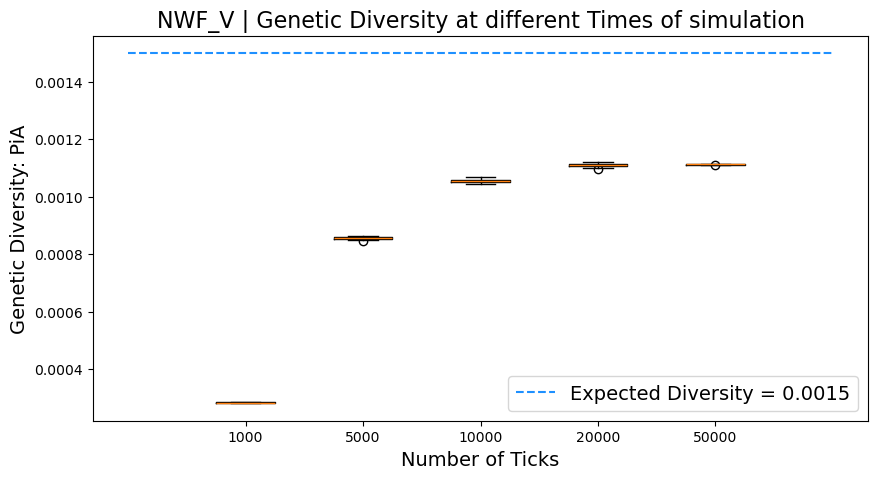

In [15]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_Vanilla/NWFV_HetPiWa_TICKS/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_Vanilla/NWFV_HetPiWa_TICKS/"
Lticks=[1000,5000,10000,20000,50000]
expected_ratio = 0.75
expected_teta = round (4*750*40*1.25e-8,10)
L_Ratio = [0 for i in range (len(Lticks))]
L_A = [0 for i in range (len(Lticks))]
counter = 0

for NTICKS in Lticks:
    Pi_ratio = []
    PiA = []
    for NUM in range(1,501):
        File = FOLDER+"NWFV_HetPiWa_NTicks"+str(NTICKS)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            Pi_ratio.append(float(Values[7])/float(Values[6]))
            PiA.append(float(Values[6]))
            Text.close()
    L_Ratio[counter] = Pi_ratio
    L_A[counter] = PiA  
    counter += 1

    
fig, ax = mp.subplots(figsize=(10, 5))
    
ax.boxplot(L_Ratio,tick_labels=Lticks)
ax.set_title("NWF_V | X-to-A Ratio at different Times of simulation", fontsize=16)
ax.set_xlabel("Number of Ticks",fontsize= 14)
ax.set_ylabel("Genetic Ratio: PiX / PiA",fontsize= 14)
#ax.set_ylim([0.6, 1])
ax.plot([i for i in range (0,7)], [expected_ratio for i in range (0,7)], linestyle='--', color='green', markersize=5, label='Expected Ratio = '+str(expected_ratio))
ax.legend(fontsize=14)
fig.savefig(FOLDER_output+'NWFV_PiRatio_Ticks.png') 

mp.show()

print()
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print()

fig, ax = mp.subplots(figsize=(10, 5))
    
ax.boxplot(L_A,tick_labels=Lticks)
ax.set_title("NWF_V | Genetic Diversity at different Times of simulation", fontsize=16)
ax.set_xlabel("Number of Ticks",fontsize= 14)
ax.set_ylabel("Genetic Diversity: PiA",fontsize= 14)
#ax.set_ylim([0.6, 1])
ax.plot([i for i in range (0,7)], [expected_teta for i in range (0,7)], linestyle='--', color='dodgerblue', markersize=5, label='Expected Diversity = '+str(expected_teta))
ax.legend(fontsize=14)
fig.savefig(FOLDER_output+'NWFV_Pi_Ticks.png') 

mp.show()

